# Import Libraries

In [1]:
from PIL import Image, ImageOps
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn import datasets
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from IPython.core.display import display,HTML

# Prepare Data(Picture)

In [2]:
j = 0
picture = np.zeros((54, 10000))
imgfiles = [ 'flying01.png', 'flying02.png', 'flying03.png', 'flying04.png', 'flying05.png', 'flying06.png', 'flying07.png', 'flying08.png' 
                , 'flying09.png', 'flying10.png', 'flying11.png', 'flying12.png', 'flying13.png', 'flying14.png', 'flying15.png', 'flying16.png'
                , 'flying17.png', 'flying18.png', 'flying19.png', 'flying20.png', 'flying21.png', 'flying22.png', 'flying23.png', 'flying24.png'
                , 'n-flying01.png', 'n-flying02.png', 'n-flying03.png', 'n-flying04.png', 'n-flying05.png', 'n-flying06.png', 'n-flying07.png'
                , 'n-flying08.png', 'n-flying09.png', 'n-flying10.png', 'n-flying11.png', 'n-flying12.png', 'n-flying13.png', 'n-flying14.png'
                , 'n-flying15.png', 'n-flying16.png', 'n-flying17.png', 'n-flying18.png', 'n-flying19.png', 'n-flying20.png', 'n-flying21.png'
                , 'n-flying22.png', 'n-flying23.png', 'n-flying24.png', 'n-flying25.png', 'n-flying26.png', 'n-flying27.png', 'n-flying28.png'
                , 'n-flying29.png', 'n-flying30.png']
for i in imgfiles:
    img = Image.open(i).convert('L')
    img = ImageOps.invert(img)
    img = img.resize((100,100), Image.ANTIALIAS)
    pixel = np.array(img)
    pixel = pixel/255.0 * 16
    pixel = pixel.astype('int')
    picture[j,:] = pixel.reshape(1,-1)
    j = j+1

# Check Picture

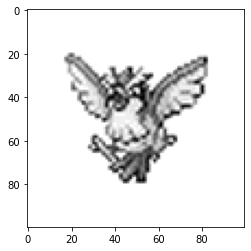

In [3]:
#fig = plt.figure(figsize = (2, 2))
plt.imshow(picture[18].reshape(100, 100), cmap=plt.cm.binary )

# Input type of  each picture

In [4]:
y = [ 'flying', 'flying', 'flying', 'flying', 'flying', 'flying', 'flying', 'flying', 'flying', 'flying', 'flying', 'flying'
      , 'flying', 'flying', 'flying', 'flying', 'flying', 'flying', 'flying', 'flying', 'flying', 'flying', 'flying', 'flying'
      , 'non-flying', 'non-flying', 'non-flying', 'non-flying', 'non-flying', 'non-flying', 'non-flying', 'non-flying'
      , 'non-flying', 'non-flying', 'non-flying', 'non-flying', 'non-flying', 'non-flying', 'non-flying', 'non-flying'
      , 'non-flying', 'non-flying', 'non-flying', 'non-flying', 'non-flying', 'non-flying', 'non-flying', 'non-flying'
      , 'non-flying', 'non-flying', 'non-flying', 'non-flying', 'non-flying', 'non-flying' ]

# Split Data into train-test set

In [5]:
X = picture
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.8, random_state=6 )

In [6]:
print(len(X_test))
print(len(y_test))
print(len(X_train))
print(len(y_train))

11
11
43
43


# Fit model

In [7]:
model = MLPClassifier()
model.fit(X_train, y_train)

MLPClassifier()

In [8]:
y_predict = model.predict(X_test)

In [9]:
df = pd.DataFrame (data = y_test, columns = ['Test'])
df[' predicted '] = y_predict
df

,Test,predicted
0,non-flying,non-flying
1,non-flying,non-flying
2,non-flying,non-flying
3,flying,flying
4,flying,flying
5,flying,flying
6,flying,flying
7,non-flying,non-flying
8,flying,flying
9,non-flying,non-flying


In [10]:
print('Accuracy (%) :{:.2f}% \n'.format(accuracy_score(y_test, y_predict)*100))
print('Confusion Matrix:\n',confusion_matrix(y_test, y_predict))
print('\n Classification Report \n',classification_report(y_test, y_predict))

Accuracy (%) :100.00% 

Confusion Matrix:
 [[5 0]
 [0 6]]

 Classification Report 
               precision    recall  f1-score   support

      flying       1.00      1.00      1.00         5
  non-flying       1.00      1.00      1.00         6

    accuracy                           1.00        11
   macro avg       1.00      1.00      1.00        11
weighted avg       1.00      1.00      1.00        11



In [11]:
cvs = cross_val_score(model, X, y, cv = 5)
print(cvs)
cvs.mean()

[0.90909091 0.90909091 0.72727273 0.72727273 1.        ]


0.8545454545454545

# Predict with unseen pictures

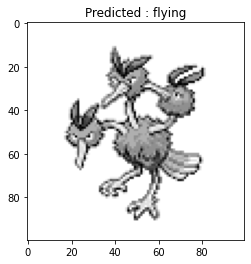

In [12]:
model.fit(X, y)
unseen = 'dodrio-f.png'
img = Image.open(unseen).convert('L')
img = ImageOps.invert(img)
img = img.resize((100,100), Image.ANTIALIAS)
pixel = np.array(img)
pixel = pixel/255.0 * 16
pixel = pixel.astype('int')
pic = pixel.reshape(1,-1)
predict = model.predict(pic)
plt.imshow(pixel, cmap=plt.cm.binary)
plt.title('Predicted : {}'.format(predict[0]))
plt.show()

In [13]:
k=0
testpic = np.zeros((11, 10000))
unseenpic = ['flyingtest01.png', 'flyingtest02.png', 'flyingtest03.png', 'flyingtest04.png', 'flyingtest05.png'
            , 'n-flyingtest01.png', 'n-flyingtest02.png', 'n-flyingtest03.png', 'n-flyingtest04.png', 'n-flyingtest05.png', 'n-flyingtest06.png']

for i in unseenpic:
    img = Image.open(i).convert('L')
    img = ImageOps.invert(img)
    img = img.resize((100,100), Image.ANTIALIAS)
    pixel = np.array(img)
    pixel = pixel/255.0 * 16
    pixel = pixel.astype('int')
    testpic[k,:] = pixel.reshape(1,-1)
    predicttest = model.predict(testpic)
    k = k+1

In [14]:
df2 = pd.DataFrame(columns = ['Files','image'])
images = ['https://img.pokemondb.net/sprites/black-white/normal/lugia.png',
          'https://img.pokemondb.net/sprites/black-white/normal/braviary.png',
         'https://img.pokemondb.net/sprites/black-white/normal/venomoth.png',
          'https://img.pokemondb.net/sprites/diamond-pearl/normal/pelipper.png',
         'https://img.pokemondb.net/sprites/diamond-pearl/normal/xatu-f.png',
          'https://img.pokemondb.net/sprites/black-white/normal/bisharp.png',
         'https://img.pokemondb.net/sprites/black-white/normal/genesect.png',
          'https://img.pokemondb.net/sprites/black-white/normal/floatzel.png',
         'https://img.pokemondb.net/sprites/black-white/normal/fraxure.png',
         'https://img.pokemondb.net/sprites/black-white/normal/sceptile.png',
         'https://img.pokemondb.net/sprites/black-white/normal/registeel.png'] 


df2['image'] = images

def path_to_image_html(path):
    return '<img src="'+ path + '" width="100" >'

df2['Files'] = unseenpic
df2['Predicted'] = predicttest

display(HTML(df2.to_html(escape=False ,formatters=dict(image=path_to_image_html))))
display

,Files,image,Predicted
0,flyingtest01.png,,flying
1,flyingtest02.png,,flying
2,flyingtest03.png,,flying
3,flyingtest04.png,,flying
4,flyingtest05.png,,flying
5,n-flyingtest01.png,,non-flying
6,n-flyingtest02.png,,non-flying
7,n-flyingtest03.png,,non-flying
8,n-flyingtest04.png,,non-flying
9,n-flyingtest05.png,,non-flying


<function IPython.core.display.display(*objs, include=None, exclude=None, metadata=None, transient=None, display_id=None, **kwargs)>